<a href="https://colab.research.google.com/github/sai-krishna-dalai-333/AI-ML/blob/main/lin_model_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving archive.zip to archive (1).zip
User uploaded file "archive.zip" with length 11090 bytes


In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("archive.zip")
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [7]:
null=df.isnull().sum()
null


Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [10]:
data=df.fillna(data.mean())
data.head(10)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0.0,0,0,1


In [11]:
null=data.isnull().sum()
null

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [13]:
data.shape

(1309, 28)

In [17]:
train=data[0:1000]
#train.head()
train.shape

(1000, 28)

In [19]:
test=data[1000:]
#data.shape
test.shape

(309, 28)

In [20]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [21]:
fea=['Age','Fare','Sex','Embarked']
train_in=train[fea]
out='2urvived'
train_out=train[out]
train_in

,Age,Fare,Sex,Embarked
0,22.0,7.2500,0,2.0
1,38.0,71.2833,1,0.0
2,26.0,7.9250,1,2.0
3,35.0,53.1000,1,2.0
4,35.0,8.0500,0,2.0
...,...,...,...,...
995,16.0,8.5167,1,0.0
996,28.0,22.5250,0,2.0
997,21.0,7.8208,0,1.0
998,28.0,7.7500,0,1.0


In [23]:
fea=['Age','Fare','Sex','Embarked']
test_in=test[fea]
out='2urvived'
test_out=test[out]
test_in

,Age,Fare,Sex,Embarked
1000,18.5,13.0000,0,2.0
1001,41.0,15.0458,0,0.0
1002,28.0,7.7792,1,1.0
1003,36.0,31.6792,1,0.0
1004,18.5,7.2833,1,1.0
...,...,...,...,...
1304,28.0,8.0500,0,2.0
1305,39.0,108.9000,1,0.0
1306,38.5,7.2500,0,2.0
1307,28.0,8.0500,0,2.0


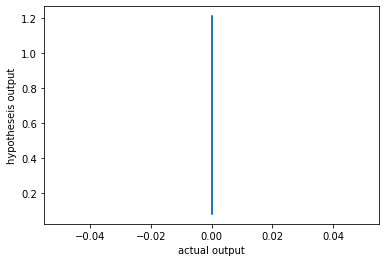

In [24]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_in,train_out)
pre=lm.predict(test_in)
plt.xlabel("actual output")
plt.ylabel("hypotheseis output")
plt.plot(test_out,pre)
plt.show()

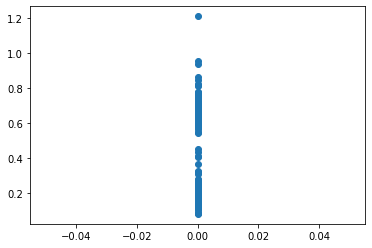

In [25]:
plt.scatter(test_out,pre)

In [27]:
c=lm.coef_
c

array([-0.00202293,  0.0012059 ,  0.45444995, -0.03579696])

In [28]:
inter=lm.intercept_
inter

0.2550647421217574

In [32]:
from mpl_toolkits.mplot3d import Axes3D